In [21]:
import pandas as pd
import requests as rq
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cards = rq.get("https://api.scryfall.com/cards/search?q=t:creature+sort:edhrec").json()['data']

In [156]:
data = pd.DataFrame(cards)
data.head(5)

,object,id,oracle_id,multiverse_ids,mtgo_id,arena_id,tcgplayer_id,cardmarket_id,name,lang,...,purchase_uris,flavor_text,produced_mana,promo_types,all_parts,mtgo_foil_id,watermark,frame_effects,card_faces,color_indicator
0,card,7bbd2cab-538e-4932-a828-150e3e9d52ad,00c0543c-2a1f-4425-8283-4062d74a1637,[485562],81705.0,72021.0,215510.0,467794.0,Solemn Simulacrum,en,...,{'tcgplayer': 'https://shop.tcgplayer.com/prod...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,c83be2b7-0373-4389-9aa0-523db58f4d2a,e3afc704-220f-498f-9eaa-0821b17dc24c,[482815],NaN,NaN,212531.0,454083.0,Sakura-Tribe Elder,en,...,{'tcgplayer': 'https://shop.tcgplayer.com/prod...,There were no tombstones in orochi territory. ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,d74e7ded-d063-4d90-a9ff-91c44a8098d7,30b24e8e-3b0e-4d8e-90f3-f66eb7c1858c,[500905],85662.0,NaN,227335.0,514639.0,Eternal Witness,en,...,{'tcgplayer': 'https://shop.tcgplayer.com/prod...,"She remembers every word spoken, from the hero...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,card,73542493-cd0b-4bb7-a5b8-8f889c76e4d6,68954295-54e3-4303-a6bc-fc4547a4e3a3,[450261],68161.0,68310.0,168646.0,359654.0,Llanowar Elves,en,...,{'tcgplayer': 'https://shop.tcgplayer.com/prod...,"As patient and generous as life, as harsh and ...",[G],[starterdeck],NaN,NaN,NaN,NaN,NaN,NaN
4,card,feefe9f0-24a6-461c-9ef1-86c5a6f33b83,d3a0b660-358c-41bd-9cd2-41fbf3491b1a,[416933],NaN,NaN,121762.0,291794.0,Birds of Paradise,en,...,{'tcgplayer': 'https://shop.tcgplayer.com/prod...,"""The gods used their feathers to paint all the...","[B, G, R, U, W]",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
# Deals with DFC
dfc = data[~data['card_faces'].isna()]
dual_faced = pd.DataFrame()

# For each card that is a DFC, add it to the new dataframe
for idx, card in dfc.iterrows():
    keywords = card['keywords']
    color_identity = card['color_identity']
    
    front_face = card['card_faces'][0]
    front_face['keywords'] = keywords
    front_face['color_identity'] = color_identity
    
    back_face = card['card_faces'][1]
    back_face['keywords'] = keywords
    back_face['color_identity'] = color_identity
    
    dual_faced = dual_faced.append(front_face, ignore_index=True)
    dual_faced = dual_faced.append(back_face, ignore_index=True)

# Drop the cards that were double faced, and add each card face individually
data.drop(dfc.index, inplace=True)
data = data.append(dual_faced, ignore_index=True)

# Drop all non-creatures (if any DFC introduced non creatures entry)
data = data[data['type_line'].str.contains('Creature')]

In [158]:
# Deals with special power and toughness, if any
data['especial_p_t'] = (data['power'] == '*') | (data['toughness'] == '*')

data['power'].replace("*", "0", inplace=True)
data['toughness'].replace("*", "0", inplace=True)

# Convert columns to integer
numerical_columns = ['cmc', 'power', 'toughness']
for column in numerical_columns:
    data[column] = data[column].astype(float)


In [159]:
keep_columns = ['name', 'mana_cost', 'colors', 'cmc', # Card heading
                'type_line', # Type Line
                'keywords', 'oracle_text', # Text Box
                'power', 'toughness',  # Power and Thoughness
                'color_identity', 'artist', 'edhrec_rank', 'card_faces', 'especial_p_t'] # Misc.

data = data[keep_columns]
data.tail().T

,170,171,172,173,175
name,"Erebos, God of the Dead","Multani, Yavimaya's Avatar",Noxious Gearhulk,Disciple of Bolas,"Ormendahl, Profane Prince"
mana_cost,{3}{B},{4}{G}{G},{4}{B}{B},{3}{B},
colors,[B],[G],[B],[B],[B]
cmc,4.0,6.0,6.0,4.0,NaN
type_line,Legendary Enchantment Creature — God,Legendary Creature — Elemental Avatar,Artifact Creature — Construct,Creature — Human Wizard,Legendary Creature — Demon
keywords,[Indestructible],"[Reach, Trample]",[Menace],[],"[Flying, Lifelink, Indestructible, Transform, ..."
oracle_text,Indestructible\nAs long as your devotion to bl...,"Reach, trample\nMultani, Yavimaya's Avatar get...",Menace\nWhen Noxious Gearhulk enters the battl...,"When Disciple of Bolas enters the battlefield,...","Flying, lifelink, indestructible, haste"
power,5.0,0.0,5.0,2.0,9.0
toughness,7.0,0.0,4.0,1.0,7.0
color_identity,[B],[G],[B],[B],[B]


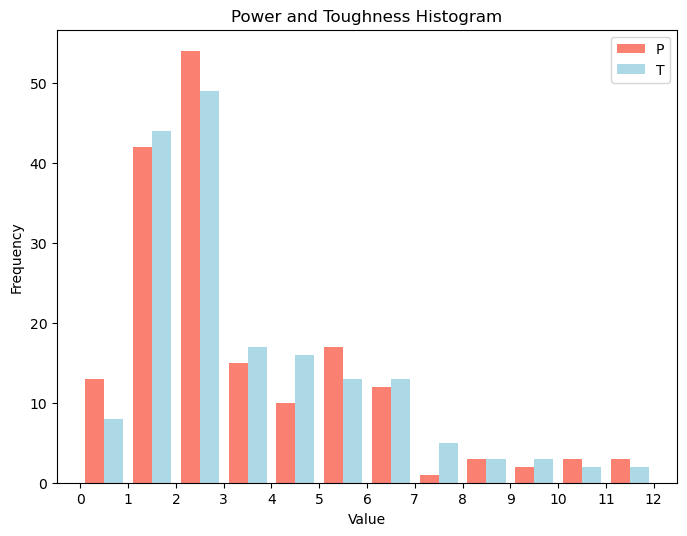

In [160]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# We add one for the 0 P/T bin (clone effects, enters with coutners, etc...)
bins= int(max(data.power.max(), data.toughness.max())) + 1

ax.hist([data.power, data.toughness], bins=range(bins), label=["P", "T"], color=['salmon', 'lightblue'])
ax.set(title="Power and Toughness Histogram",
      xlabel="Value",
      ylabel="Frequency",
      xticks=range(bins))

ax.legend();

In [165]:
colors = "U,W,B,R,G".split(",")
for c in colors:
    data['color_'+c] = data['colors'].str.contains(c, regex=False)
    data['identity'+c] = data['color_identity'].str.contains(c, regex=False)
    

blue_creatures = data[data.color_U]
black_creatures = data[data.color_B]
white_creatures = data[data.color_W]
green_creatures = data[data.color_G]
red_creatures = data[data.color_R]

data.head()

,name,mana_cost,colors,cmc,type_line,keywords,oracle_text,power,toughness,color_identity,...,color_U,color_W,color_B,color_R,color_G,identityU,identityW,identityB,identityR,identityG
0,Solemn Simulacrum,{4},[],4.0,Artifact Creature — Golem,[],"When Solemn Simulacrum enters the battlefield,...",2.0,2.0,[],...,False,False,False,False,False,False,False,False,False,False
1,Sakura-Tribe Elder,{1}{G},[G],2.0,Creature — Snake Shaman,[],Sacrifice Sakura-Tribe Elder: Search your libr...,1.0,1.0,[G],...,False,False,False,False,True,False,False,False,False,True
2,Eternal Witness,{1}{G}{G},[G],3.0,Creature — Human Shaman,[],"When Eternal Witness enters the battlefield, y...",2.0,1.0,[G],...,False,False,False,False,True,False,False,False,False,True
3,Llanowar Elves,{G},[G],1.0,Creature — Elf Druid,[],{T}: Add {G}.,1.0,1.0,[G],...,False,False,False,False,True,False,False,False,False,True
4,Birds of Paradise,{G},[G],1.0,Creature — Bird,[Flying],Flying\n{T}: Add one mana of any color.,0.0,1.0,[G],...,False,False,False,False,True,False,False,False,False,True


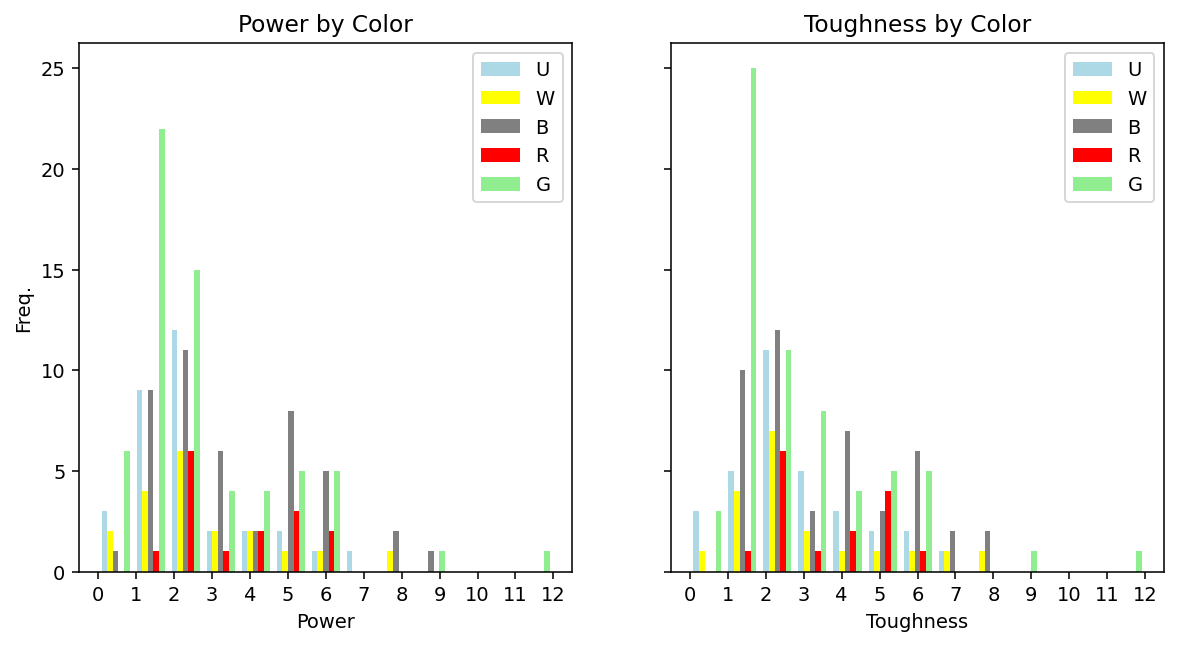

In [164]:
fig, ax = plt.subplots(ncols=2, figsize=(10,5), dpi=140, sharey=True)

ax[0].hist( [blue_creatures.power, 
          white_creatures.power, 
          black_creatures.power, 
          red_creatures.power,
          green_creatures.power], 
        bins=bins,
        color = ['lightblue', 
                 'yellow', 
                 'gray', 
                 'red', 
                 'lightgreen'],
        label=colors);
ax[0].set( title = "Power by Color",
           ylabel="Freq.",
           xlabel="Power",
           xticks=range(bins)
);
ax[0].legend()


ax[1].hist( [blue_creatures.toughness, 
          white_creatures.toughness, 
          black_creatures.toughness, 
          red_creatures.toughness,
          green_creatures.toughness], 
        bins=bins,
        color = ['lightblue', 
                 'yellow', 
                 'gray', 
                 'red', 
                 'lightgreen'],
        label=colors);

ax[1].set( title = "Toughness by Color",
    xlabel="Toughness",
    xticks=range(bins))

ax[1].legend();

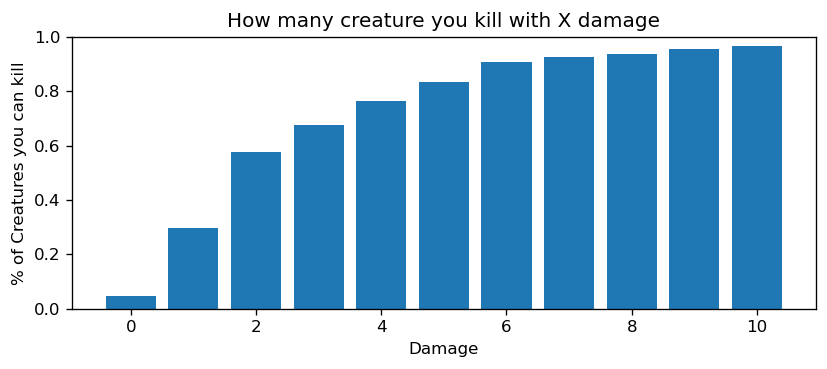

In [177]:
# How effective is damage based removal?
fig, ax = plt.subplots(figsize=(8,3), dpi=120)
are_destroyable = data[~data.keywords.str.contains("Indestructible", regex=False)]
cumsum_amount = np.cumsum( are_destroyable.groupby("toughness")['name'].count() )

ax.bar(range(1,len(cumsum_amount)+1), cumsum_amount/len(data))

ax.set(title='How many creature you kill with X damage',
       xlabel = 'Damage',
       ylabel = '% of Creatures you can kill')

ax.set_ybound(0,1)